In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
pokemon = pd.read_csv(r"C:\Users\serda\Downloads\pokemon.csv")
print(pokemon.shape)
pokemon.head(5)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


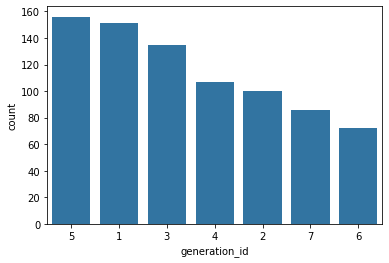

In [9]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

In [7]:
#to specify the baseline color and set it to 1 color
base_color = sb.color_palette()[0]

In [8]:
#in order to display the bar charts from most frequent to less
gen_order = pokemon['generation_id'].value_counts().index

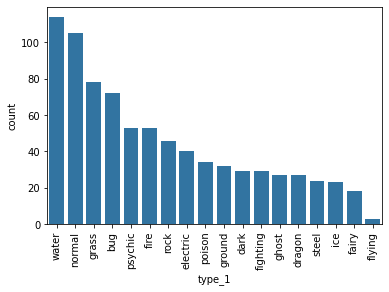

In [10]:
base_color = sb.color_palette()[0]
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, x = 'type_1', color = base_color, order = type_order);
plt.xticks(rotation = 90);

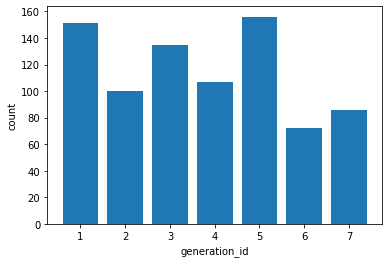

In [11]:
#create bar chart using matplotlib
x = pokemon['generation_id'].unique()
y = pokemon['generation_id'].value_counts(sort=False)

plt.xlabel('generation_id')
plt.ylabel('count')
plt.bar(x,y);

In [12]:
pkmn_types = pokemon.melt(id_vars=['id','species'],
                          value_vars =['type_1','type_2'],
                          var_name='type_level',
                           value_name = 'type')

In [13]:
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [23]:
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

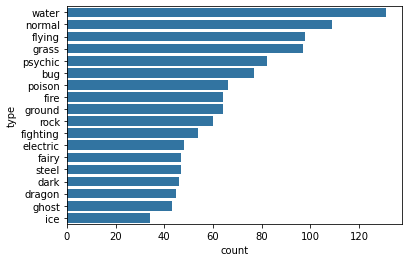

In [24]:
base_color = sb.color_palette()[0]
type_order =type_counts.index
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

**Find the maximum proportion of bar**

In [26]:
#sum of all type counts
not_null = pkmn_types['type'].value_counts().sum()
not_null

1212

In [29]:
##what is the highest frequency in type column
max_type_count = type_counts[0]
max_type_count

131

In [32]:
#calculation of proportion for the biggest value: 
prop = max_type_count / not_null
prop

0.10808580858085809

**Create an array of evenly spaced proportioned values**

In [33]:
tick_props = np.arange(0, prop, 0.02)

In [34]:
#to apply the tick_props we need to use the list comprehension

# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.

tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names


['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

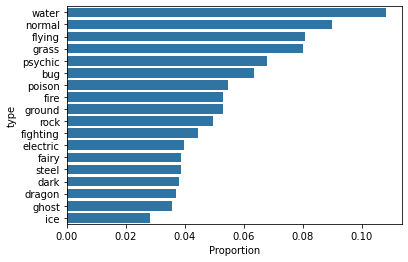

In [35]:
sb.countplot(data = pkmn_types, y='type', color = base_color, order = type_order)
plt.xticks(tick_props * not_null, tick_names)
plt.xlabel('Proportion');

In [36]:
type_counts.shape[0]

18

**Adding the text (proportion) on the bars of a horizontal plot.**

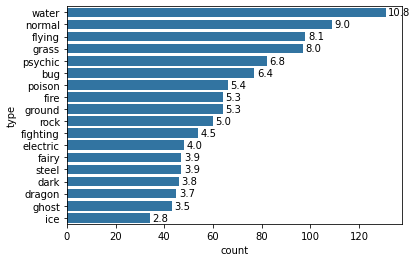

In [39]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}'.format(100*count/not_null)
    plt.text(count+1,i,pct_string,va='center')


**Print the text (proportion) below the bars of a Vertical plot.**


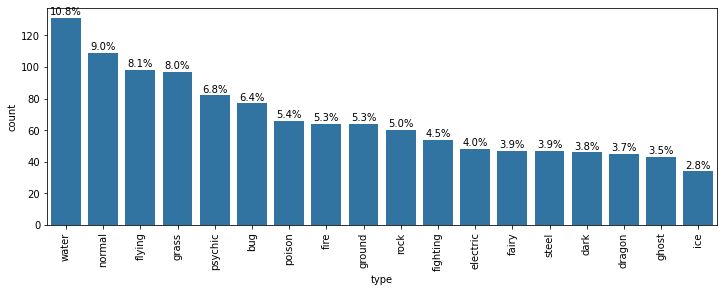

In [42]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/not_null)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

In [41]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4